In [1]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import math
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
img_bgr = cv2.imread("/content/drive/MyDrive/Images/6/Lena.bmp")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

In [34]:
def color_image_change_bits (image, r_new_bits, g_new_bits, b_new_bits):
  image_r, image_g, image_b = cv2.split(image)

  bit_changed_image_r = image_r >> (8 - r_new_bits)
  bit_changed_image_g = image_g >> (8 - g_new_bits)
  bit_changed_image_b = image_b >> (8 - b_new_bits)

  bit_changed_image = np.zeros((512,512,3))

  bit_changed_image[:, :, 0] = bit_changed_image_r
  bit_changed_image[:, :, 1] = bit_changed_image_g
  bit_changed_image[:, :, 2] = bit_changed_image_b

  return bit_changed_image

Text(0.5, 1.0, 'Image: Bit Changed RGB Zoomed')

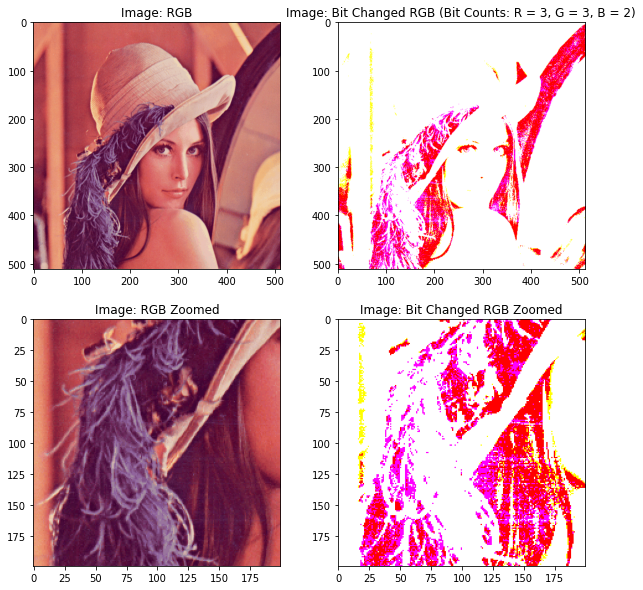

In [35]:
r_new_bits = 3
g_new_bits = 3
b_new_bits = 2

bit_changed_image = color_image_change_bits(img_rgb, r_new_bits, g_new_bits, b_new_bits)

fig, plot = plt.subplots(2, 2, figsize = (10, 10))

plot[0][0].imshow(img_rgb)
plot[0][0].set_title("Image: RGB")

plot[0][1].imshow(bit_changed_image)
plot[0][1].set_title("Image: Bit Changed RGB (Bit Counts: R = " + str(r_new_bits) + ", G = " + str(g_new_bits) + ", B = " + str(b_new_bits) + ")")

plot[1][0].imshow(img_rgb[250:450, 50:250])
plot[1][0].set_title("Image: RGB Zoomed")

plot[1][1].imshow(bit_changed_image[250:450, 50:250])
plot[1][1].set_title("Image: Bit Changed RGB Zoomed")